Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Aula 3 - Data Wrangling

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---



Nesta prática faremos a análise dos dados da Covid19 no Brasil até o momento. Algumas células estão preenchidas para auxiliar na leitura dos dados. Faça o que se pede.

In [2]:
# Bibliotecas utilizadas
import pandas as pd

Extraia os dados baixados de https://covid.saude.gov.br/

Criar uma lista de `Dataframes`. Estamos aqui fazendo um casting para tornar a coluna de datas em um formato específico de datas do Python ao invés de texto. Também se colocou a coluna de data como o índice.

In [3]:
lista_df = []

anos = (2020, 2021, 2022)

for ano in anos:
    for parte in (1,2):
        arq = f'HIST_PAINEL_COVIDBR_{ano}_Parte{parte}_17ago2022.csv'
        print(f'lendo o arquivo {arq}')
        lista_df.append(pd.read_csv(arq, sep=';', parse_dates=['data'], index_col=['data']) )


lendo o arquivo HIST_PAINEL_COVIDBR_2020_Parte1_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2020_Parte2_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2021_Parte1_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2021_Parte2_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2022_Parte1_17ago2022.csv
lendo o arquivo HIST_PAINEL_COVIDBR_2022_Parte2_17ago2022.csv


Faça aqui o concatenamento das linhas dos `dataframes` da lista em um `dataframe` único. 

In [4]:
df = pd.concat(lista_df)

Nosso objetivo é mostrar somente os valores a nível de Brasil. Faça um filtro das linhas baseado na coluna `regiao` somente para a correspondência `Brasil`. Salve este filtro em um `Dataframe`.

In [5]:
df_brasil = df[df['regiao'] == 'Brasil']

Selecione somente as colunas 'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos' do `Dataframe` e descarte as demais.

In [6]:
df_brasil_casos = df_brasil[['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]

Faça aqui o gráfico de 'casosAcumulado' ao longo dos dias desde o começo da pandemia.

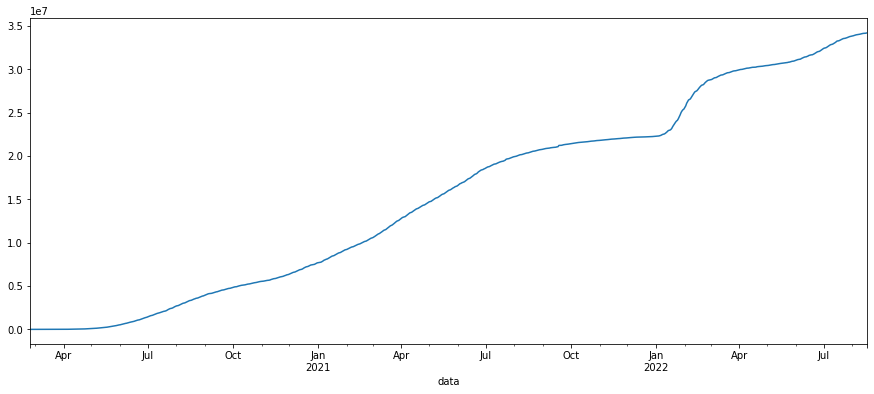

In [7]:
df_brasil_casos['casosAcumulado'].plot(figsize=(15, 6));

Faça aqui o gráfico de 'obitosAcumulado' ao longo dos dias desde o começo da pandemia.

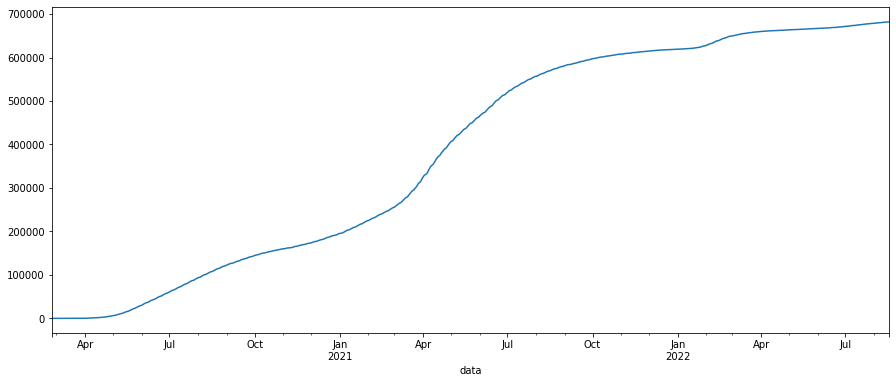

In [8]:
df_brasil_casos['obitosAcumulado'].plot(figsize=(15, 6));

Qual a quantidade total de óbitos por Covid19 no Brasil a partir da análise desses dados?

In [9]:
df_brasil_casos['obitosAcumulado'].max()

682010

Crie uma coluna com a media móvel dos 'casosNovos' e 'obitosNovos'. Use uma janela de 7 dias para o cálculo da média móvel.

Use o seguinte exemplo como referência para calcular a média móvel.

```python

df['nomeColuna'].rolling(Janela).mean()
```

In [10]:
import warnings
warnings.filterwarnings('ignore')

df_brasil_casos['casosNovos_media'] = df_brasil_casos['casosNovos'].rolling(7).mean()
df_brasil_casos['obitosNovos_media'] = df_brasil_casos['obitosNovos'].rolling(7).mean()

Faça um gráfico da evolução dos casos e sua média móvel. Use a coluna 'casosNovos' para a evolução diária de casos e a coluna referente à média móvel de casos que você calculou.

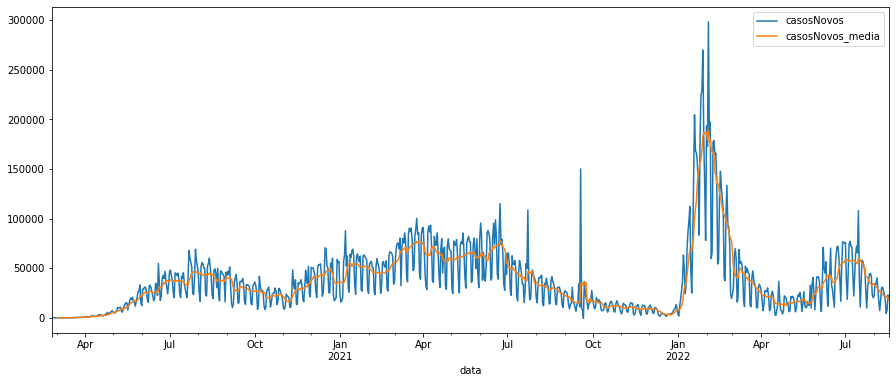

In [11]:
df_brasil_casos[['casosNovos', 'casosNovos_media']].plot(figsize=(15, 6));

Faça um gráfico da evolução dos óbitos e sua média móvel. Use a coluna 'obitosNovos' para a evolução diária de óbitos e a coluna referente à média móvel de óbitos que você calculou.

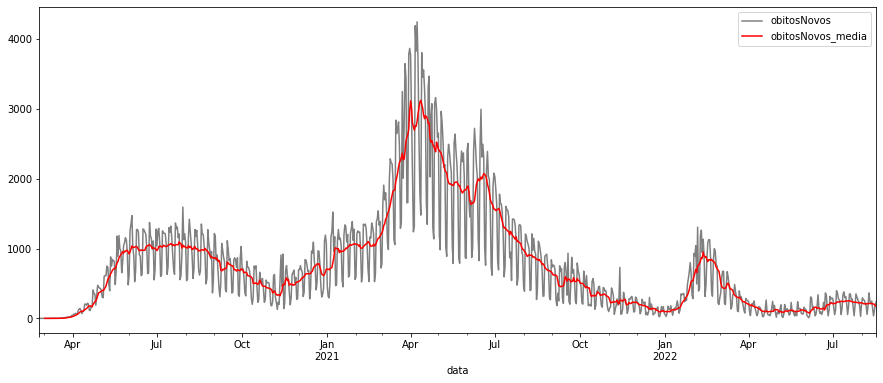

In [35]:
df_brasil_casos[['obitosNovos', 'obitosNovos_media']].plot(figsize=(15, 6), color=['grey', 'red']);

Qual o dia com o maior registro de óbitos e qual é esse valor?

In [13]:
df_brasil_casos.query('obitosNovos == obitosNovos.max()').index.values

array(['2021-04-08T00:00:00.000000000'], dtype='datetime64[ns]')

Qual o dia com a maior média móvel de óbitos e qual é esse valor?

In [14]:
df_brasil_casos.query('obitosNovos_media == obitosNovos_media.max()').index.values

array(['2021-04-12T00:00:00.000000000'], dtype='datetime64[ns]')

Comparando os valores de obitos em SP e RJ

In [27]:
df_sp = df[['municipio', 'obitosNovos', 'obitosAcumulado']].query('municipio == "São Paulo"').copy()
df_rj = df[['municipio', 'obitosNovos', 'obitosAcumulado']].query('municipio == "Rio de Janeiro"').copy()

display(df_sp.describe().T, df_rj.describe().T)

,count,mean,std,min,25%,50%,75%,max
obitosNovos,874.0,49.824943,56.130598,-5.0,10.00,29.0,71.00,378.0
obitosAcumulado,874.0,26678.495423,14294.197659,0.0,13597.75,31216.5,39635.75,43547.0


,count,mean,std,min,25%,50%,75%,max
obitosNovos,874.0,42.804348,47.841035,-21.0,3.0,24.0,71.00,246.0
obitosAcumulado,874.0,23516.566362,12411.835383,0.0,12126.0,26765.0,35201.75,37411.0


,count,mean,std,min,25%,50%,75%,max
SP - obitosNovos,868.0,50.055135,41.410565,2.142857,16.678571,41.357143,72.178571,226.000000
RJ - obitosNovos,868.0,43.069947,33.846664,0.000000,11.714286,41.214286,64.142857,135.857143
Delta - obitosNovos,868.0,6.985188,24.646753,-50.714286,-8.000000,5.357143,16.750000,121.142857


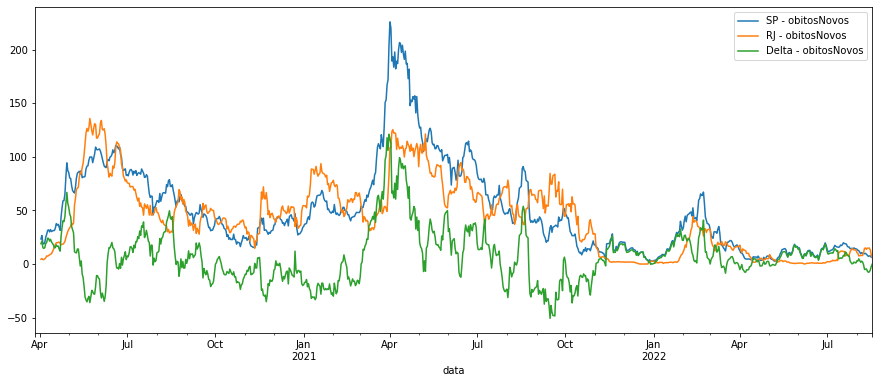

In [43]:
df_comp_novos = pd.DataFrame(index=df_sp.index)
df_comp_novos['SP - obitosNovos'] = df_sp['obitosNovos'].rolling(7).mean()
df_comp_novos['RJ - obitosNovos'] = df_rj['obitosNovos'].rolling(7).mean()
df_comp_novos['Delta - obitosNovos'] = df_comp_novos['SP - obitosNovos'] - df_comp_novos['RJ - obitosNovos']

df_comp_novos.plot(figsize=(15, 6))
df_comp_novos.describe().T

,count,mean,std,min,25%,50%,75%,max
SP - obitosAcumulado,874.0,26678.495423,14294.197659,0.0,13597.75,31216.5,39635.75,43547.0
RJ - obitosAcumulado,874.0,23516.566362,12411.835383,0.0,12126.00,26765.0,35201.75,37411.0
Delta - obitosAcumulado,874.0,3161.929062,2063.208354,-233.0,1106.50,3849.5,5078.75,6189.0


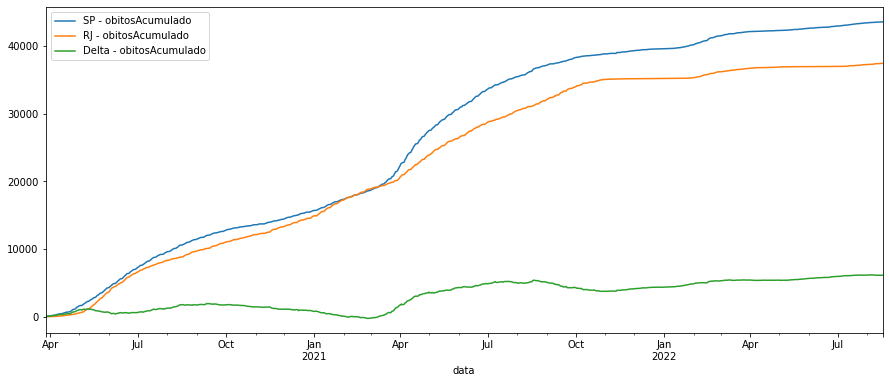

In [33]:
df_comp_acumulados = pd.DataFrame(index=df_sp.index)
df_comp_acumulados['SP - obitosAcumulado'] = df_sp['obitosAcumulado']
df_comp_acumulados['RJ - obitosAcumulado'] = df_rj['obitosAcumulado']
df_comp_acumulados['Delta - obitosAcumulado'] = df_comp_acumulados['SP - obitosAcumulado'] - df_comp_acumulados['RJ - obitosAcumulado']

df_comp_acumulados.plot(figsize=(15, 6))
df_comp_acumulados.describe().T

In [73]:
pd.DataFrame(df_comp_acumulados['SP - obitosAcumulado'])

AttributeError: 'DataFrame' object has no attribute 'to_list'